## Data Preprocessing

### Importing the libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

### Importing the dataset

In [2]:
data = pd.read_csv(r'Parkinsons Train Data_3.csv', header=0)

In [3]:
data.head()

,Jitter(local),"Jitter(local, absolute)",Jitter (rap),Jitter (ppq5),Jitter (ddp),Shimmer (local),"Shimmer (local, db)",Shimmer (apq3),Shimmer (apq5),Shimmer (apq11),...,Minimum pitch,Maximum pitch,Number of pulses,Number of periods,Mean period,Standard deviation of period,Fraction of locally unvoiced frames,Number of voice breaks,Degree of voice breaks,status
0,1.488,0.000090,0.900,0.794,2.699,8.334,0.779,4.517,4.609,6.802,...,142.229,187.576,160,159,0.006065,0.000416,0.000,0,0.000,1
1,0.728,0.000038,0.353,0.376,1.059,5.864,0.642,2.058,3.180,7.194,...,159.515,234.505,170,169,0.005181,0.000403,2.247,0,0.000,1
2,1.220,0.000074,0.732,0.670,2.196,8.719,0.875,4.347,5.166,7.548,...,146.445,211.442,1431,1427,0.006071,0.000474,10.656,1,0.178,1
3,2.502,0.000123,1.156,1.634,3.469,13.513,1.273,5.263,8.771,16.779,...,182.713,220.230,94,92,0.004910,0.000320,0.000,0,0.000,1
4,3.509,0.000167,1.715,1.539,5.145,9.112,1.040,3.102,4.927,12.823,...,182.821,225.162,117,114,0.004757,0.000380,18.182,1,13.318,1


In [4]:
data.shape

(1036, 27)

In [5]:
data.index

RangeIndex(start=0, stop=1036, step=1)

In [6]:
data.columns

Index(['Jitter(local)', 'Jitter(local, absolute)', 'Jitter (rap)',
       'Jitter (ppq5)', 'Jitter (ddp)', 'Shimmer (local)',
       'Shimmer (local, db)', 'Shimmer (apq3)', 'Shimmer (apq5)',
       'Shimmer (apq11)', 'Shimmer (dda)', 'AC', 'NDH', 'HTM', 'Median Pitch',
       'Mean Pitch', 'Standard deviation', 'Minimum pitch', 'Maximum pitch',
       'Number of pulses', 'Number of periods', 'Mean period',
       'Standard deviation of period', 'Fraction of locally unvoiced frames',
       'Number of voice breaks', 'Degree of voice breaks', 'status'],
      dtype='object')

### Checking for null values (missing values)

In [7]:
data.isnull().sum()

Jitter(local)                          0
Jitter(local, absolute)                0
Jitter (rap)                           0
Jitter (ppq5)                          0
Jitter (ddp)                           0
Shimmer (local)                        0
Shimmer (local, db)                    0
Shimmer (apq3)                         0
Shimmer (apq5)                         0
Shimmer (apq11)                        0
Shimmer (dda)                          0
AC                                     0
NDH                                    0
HTM                                    0
Median Pitch                           0
Mean Pitch                             0
Standard deviation                     0
Minimum pitch                          0
Maximum pitch                          0
Number of pulses                       0
Number of periods                      0
Mean period                            0
Standard deviation of period           0
Fraction of locally unvoiced frames    0
Number of voice 

### Selecting independent and dependent variables

In [8]:
X = data.loc[:, data.columns != 'status'].values
y = data.loc[:, 'status'].values

In [9]:
X

array([[1.48800e+00, 9.02130e-05, 9.00000e-01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [7.28000e-01, 3.76980e-05, 3.53000e-01, ..., 2.24700e+00,
        0.00000e+00, 0.00000e+00],
       [1.22000e+00, 7.40410e-05, 7.32000e-01, ..., 1.06560e+01,
        1.00000e+00, 1.78000e-01],
       ...,
       [2.91200e+00, 2.26205e-04, 1.14100e+00, ..., 2.00000e+01,
        1.00000e+00, 4.57400e+00],
       [3.78800e+00, 2.74883e-04, 1.78600e+00, ..., 1.66670e+01,
        3.00000e+00, 1.95750e+01],
       [1.80900e+00, 1.48510e-04, 6.80000e-01, ..., 1.81820e+01,
        1.00000e+00, 3.38700e+00]])

### Spliting the dataset for training and testing

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.15, random_state = 12)

In [11]:
X_train

array([[2.29400e+00, 2.23757e-04, 8.52000e-01, ..., 3.67350e+01,
        1.00000e+00, 3.05580e+01],
       [9.87000e-01, 4.15600e-05, 3.33000e-01, ..., 1.93550e+01,
        0.00000e+00, 0.00000e+00],
       [7.22800e+00, 4.01059e-04, 3.95300e+00, ..., 5.06670e+01,
        2.00000e+00, 1.88440e+01],
       ...,
       [1.03700e+00, 7.75070e-05, 5.27000e-01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.21900e+00, 8.18590e-05, 7.41000e-01, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [4.26800e+00, 3.00057e-04, 2.02600e+00, ..., 2.50000e+01,
        6.00000e+00, 2.30260e+01]])

In [12]:
X_test

array([[1.28900e+00, 7.31470e-05, 6.23000e-01, ..., 3.50650e+01,
        1.00000e+00, 1.87490e+01],
       [3.32600e+00, 1.80944e-04, 1.66600e+00, ..., 4.16670e+01,
        1.00000e+00, 4.32260e+01],
       [1.74400e+00, 1.22739e-04, 4.09000e-01, ..., 4.00000e+01,
        1.00000e+00, 2.73550e+01],
       ...,
       [5.00000e-01, 2.71960e-05, 2.09000e-01, ..., 3.03030e+01,
        0.00000e+00, 0.00000e+00],
       [3.96200e+00, 2.13240e-04, 1.80400e+00, ..., 5.70590e+01,
        7.00000e+00, 5.42470e+01],
       [2.96000e-01, 2.03310e-05, 9.80000e-02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00]])

In [13]:
y_train

array([1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0,

In [14]:
y_test

array([0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 1], dtype=int64)

### Limiting the range of variables -> to compare them commonly

In [15]:
from sklearn.preprocessing import StandardScaler
standard_X = StandardScaler()

In [16]:
standard_X = standard_X.fit(X_train)
X_train = standard_X.transform(X_train)
X_test = standard_X.transform(X_test)

In [17]:
X_train

array([[-0.22521454,  0.46680385, -0.40640902, ...,  0.42401686,
        -0.0711297 ,  1.21206042],
       [-0.95579884, -1.19694106, -0.92792881, ..., -0.40197721,
        -0.70984537, -0.81306889],
       [ 2.53278311,  2.08584972,  2.70964657, ...,  1.08614282,
         0.56758597,  0.43575422],
       ...,
       [-0.92784994, -0.86868846, -0.73298692, ..., -1.32183423,
        -0.70984537, -0.81306889],
       [-0.82611593, -0.82894786, -0.51794794, ..., -1.32183423,
        -0.70984537, -0.81306889],
       [ 0.87820811,  1.16354275,  0.77329084, ..., -0.13369548,
         3.12244864,  0.71290229]])

In [28]:
eval_set = [(X_train, y_train), (X_test, y_test)]
eval_metric = ["auc","error"]
%time model.fit(X_train, y_train, eval_metric=eval_metric, eval_set=eval_set, verbose=True)

[0]	validation_0-auc:0.732018	validation_0-error:0.336364	validation_1-auc:0.550879	validation_1-error:0.435897
[1]	validation_0-auc:0.764588	validation_0-error:0.320455	validation_1-auc:0.57784	validation_1-error:0.461538
[2]	validation_0-auc:0.792972	validation_0-error:0.284091	validation_1-auc:0.599951	validation_1-error:0.416667
[3]	validation_0-auc:0.797032	validation_0-error:0.282955	validation_1-auc:0.601348	validation_1-error:0.410256
[4]	validation_0-auc:0.804914	validation_0-error:0.280682	validation_1-auc:0.60965	validation_1-error:0.403846
[5]	validation_0-auc:0.807026	validation_0-error:0.284091	validation_1-auc:0.616883	validation_1-error:0.403846
[6]	validation_0-auc:0.820417	validation_0-error:0.272727	validation_1-auc:0.635049	validation_1-error:0.403846
[7]	validation_0-auc:0.83103	validation_0-error:0.259091	validation_1-auc:0.624281	validation_1-error:0.410256
[8]	validation_0-auc:0.839361	validation_0-error:0.254545	validation_1-auc:0.644501	validation_1-error:0.41

[73]	validation_0-auc:0.957779	validation_0-error:0.119318	validation_1-auc:0.732204	validation_1-error:0.314103
[74]	validation_0-auc:0.95845	validation_0-error:0.118182	validation_1-auc:0.729081	validation_1-error:0.314103
[75]	validation_0-auc:0.959049	validation_0-error:0.118182	validation_1-auc:0.731711	validation_1-error:0.314103
[76]	validation_0-auc:0.959716	validation_0-error:0.119318	validation_1-auc:0.733355	validation_1-error:0.314103
[77]	validation_0-auc:0.961038	validation_0-error:0.115909	validation_1-auc:0.736808	validation_1-error:0.314103
[78]	validation_0-auc:0.961146	validation_0-error:0.114773	validation_1-auc:0.737136	validation_1-error:0.314103
[79]	validation_0-auc:0.961467	validation_0-error:0.114773	validation_1-auc:0.740095	validation_1-error:0.314103
[80]	validation_0-auc:0.962603	validation_0-error:0.111364	validation_1-auc:0.737958	validation_1-error:0.314103
[81]	validation_0-auc:0.963492	validation_0-error:0.1125	validation_1-auc:0.738123	validation_1-e

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

## XG Boost

In [18]:
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
model = XGBClassifier()
model.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [20]:
score = model.score(X_test, y_test)
print(score)

0.6987179487179487


In [21]:
y_pred = model.predict(X_test)

print("Confusion Matrix")
print(confusion_matrix(y_test, y_pred))
print("\n")

print("Classfications Results")
print(classification_report(y_test, y_pred))

print("Accuracy Score")
print(accuracy_score(y_test, y_pred))

Confusion Matrix
[[48 29]
 [18 61]]


Classfications Results
              precision    recall  f1-score   support

           0       0.73      0.62      0.67        77
           1       0.68      0.77      0.72        79

    accuracy                           0.70       156
   macro avg       0.70      0.70      0.70       156
weighted avg       0.70      0.70      0.70       156

Accuracy Score
0.6987179487179487


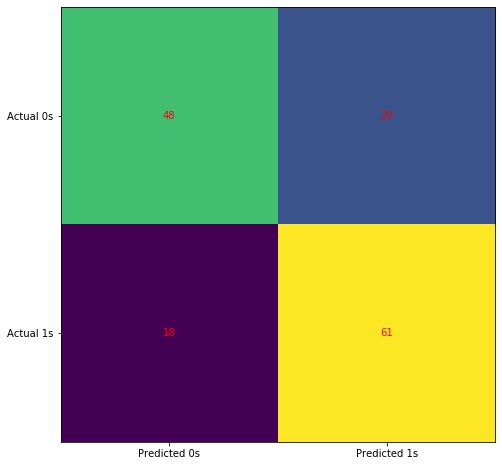

In [22]:
cm = confusion_matrix(y_test, model.predict(X_test))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Saving the model

In [23]:
import joblib
filename = 'XG Boost model.sav'
joblib.dump(model, filename)

['XG Boost model.sav']

In [24]:
import pandas as pd
pred_data = pd.read_csv(r'Parkinsons Test Data_3.csv', header=0)
pred_data=pred_data.dropna()
print(pred_data.shape)
print(list(pred_data.columns))
pred_data.head()

(189, 26)
['f0', 'f1', 'f2', 'f3', 'f4', 'f5', 'f6', 'f7', 'f8', 'f9', 'f10', 'f11', 'f12', 'f13', 'f14', 'f15', 'f16', 'f17', 'f18', 'f19', 'f20', 'f21', 'f22', 'f23', 'f24', 'f25']


,f0,f1,f2,f3,f4,f5,f6,f7,f8,f9,...,f16,f17,f18,f19,f20,f21,f22,f23,f24,f25
0,0.135,0.000007,0.067,0.078,0.202,2.033,0.178,1.074,1.336,1.576,...,0.859,184.502,187.880,183,182,0.005368,0.000025,0.0,0,0.0
1,0.143,0.000007,0.073,0.081,0.219,1.236,0.107,0.612,0.904,0.894,...,0.755,198.665,202.214,194,193,0.004988,0.000020,0.0,0,0.0
2,0.162,0.000008,0.087,0.089,0.260,1.338,0.117,0.630,0.948,1.017,...,1.860,197.220,206.060,198,197,0.004940,0.000046,0.0,0,0.0
3,0.140,0.000007,0.075,0.089,0.224,1.086,0.094,0.556,0.747,0.823,...,0.931,202.324,206.182,200,199,0.004900,0.000023,0.0,0,0.0
4,0.150,0.000007,0.080,0.097,0.240,1.049,0.091,0.533,0.698,0.777,...,0.880,205.407,209.927,204,203,0.004820,0.000022,0.0,0,0.0


In [25]:
pred_X = pred_data.loc[:, :].values
pred_X

array([[1.35000e-01, 7.30000e-06, 6.70000e-02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.43000e-01, 7.10000e-06, 7.30000e-02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       [1.62000e-01, 8.00000e-06, 8.70000e-02, ..., 0.00000e+00,
        0.00000e+00, 0.00000e+00],
       ...,
       [2.81600e+00, 1.53056e-04, 1.09000e+00, ..., 4.52380e+01,
        2.00000e+00, 5.31940e+01],
       [1.14500e+00, 5.30630e-05, 7.03000e-01, ..., 6.90480e+01,
        1.00000e+00, 5.74790e+01],
       [1.59200e+00, 8.91590e-05, 6.53000e-01, ..., 5.52630e+01,
        0.00000e+00, 0.00000e+00]])

In [26]:
pred_X = standard_X.fit_transform(pred_X)

In [27]:
pred_X

array([[-0.70099042, -0.7168957 , -0.67816489, ..., -0.31940471,
        -0.29960235, -0.24794817],
       [-0.69188618, -0.72016035, -0.66496499, ..., -0.31940471,
        -0.29960235, -0.24794817],
       [-0.67026361, -0.70546945, -0.63416524, ..., -0.31940471,
        -0.29960235, -0.24794817],
       ...,
       [ 2.35006831,  1.66231185,  1.57241691, ...,  4.31160964,
         2.05976619,  7.94301349],
       [ 0.44841999,  0.03010391,  0.7210238 , ...,  6.74903949,
         0.88008192,  8.60282983],
       [ 0.95711945,  0.61930693,  0.61102469, ...,  5.33786895,
        -0.29960235, -0.24794817]])

In [ ]:
pred_y = model.predict(pred_X)
res = pd.DataFrame(pred_y)
res.columns = ["status"]
res.to_csv("XG - predictions - all 2.csv")